In [50]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, Sequential, optimizers

# Load the dataset
df = pd.read_csv('telecom_churn.csv')

# Identify duplicate rows
duplicates = df[df.duplicated(keep=False)]

# Print duplicate rows
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Print the DataFrame after removing duplicates
print("\nData after removing duplicates:")
print(df)


No duplicate rows found.

Data after removing duplicates:
      Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0      

Correlation with 'Churn':

Churn              1.000000
CustServCalls      0.208750
DayMins            0.205151
OverageFee         0.092812
MonthlyCharge      0.072313
RoamMins           0.068239
DayCalls           0.018459
AccountWeeks       0.016541
DataUsage         -0.087195
DataPlan          -0.102148
ContractRenewal   -0.259852
Name: Churn, dtype: float64


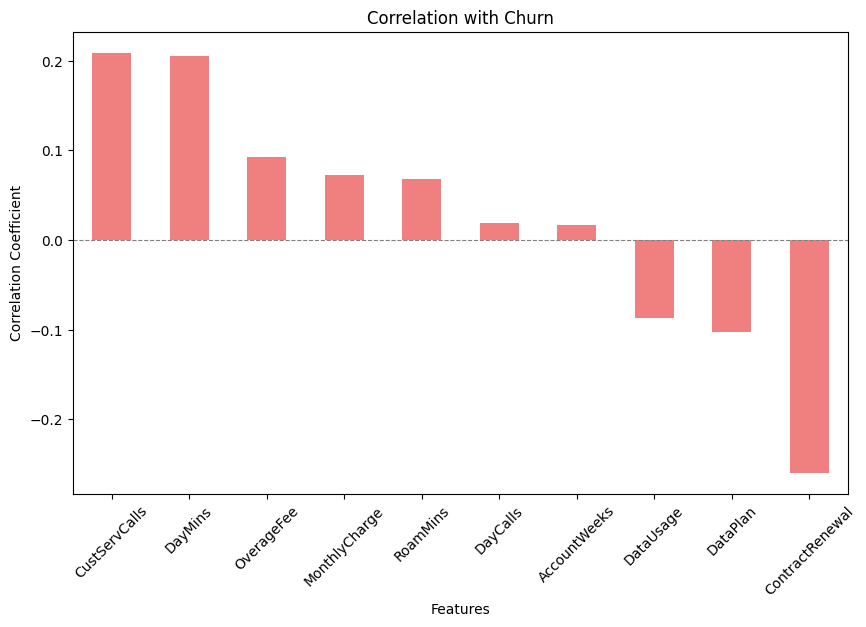

In [51]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('telecom_churn.csv')

# Encode categorical variables using LabelEncoder
label_enc = LabelEncoder()

# List of categorical columns to encode (in this case, all are numerical except 'ContractRenewal' and 'DataPlan')
categorical_columns = ['ContractRenewal', 'DataPlan']

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_enc.fit_transform(df[column])

# Convert target 'Churn' into numerical format (if not already)
df['Churn'] = label_enc.fit_transform(df['Churn'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Correlation with the target variable 'Churn'
correlation_with_target = correlation_matrix['Churn'].sort_values(ascending=False)

# Print correlation values with 'Churn'
print("Correlation with 'Churn':\n")
print(correlation_with_target)

# Visualize the correlation with 'Churn' using a bar plot
plt.figure(figsize=(10, 6))
correlation_with_target.drop('Churn').plot(kind='bar', color='lightcoral')
plt.title('Correlation with Churn')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Add a horizontal line at 0
plt.show()


Column names before cleaning:
Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')
Column names after cleaning:
Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')


C:\Users\haris\AppData\Local\Temp\ipykernel_280\4231488644.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette={"no": "blue", "yes": "red"})


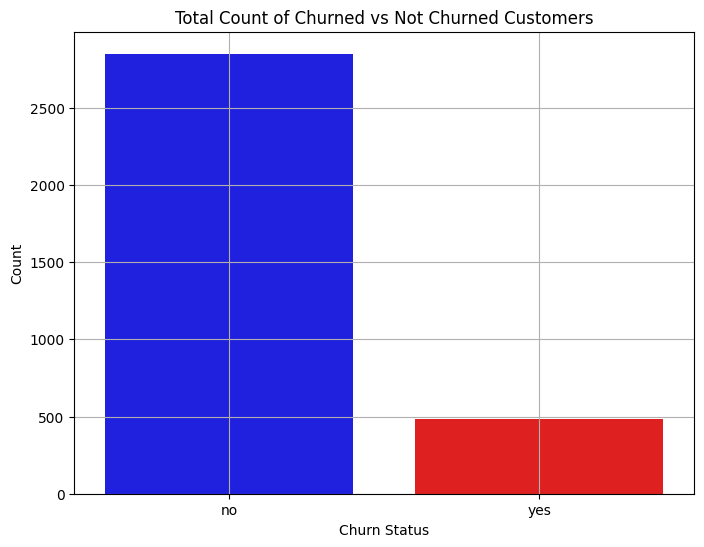

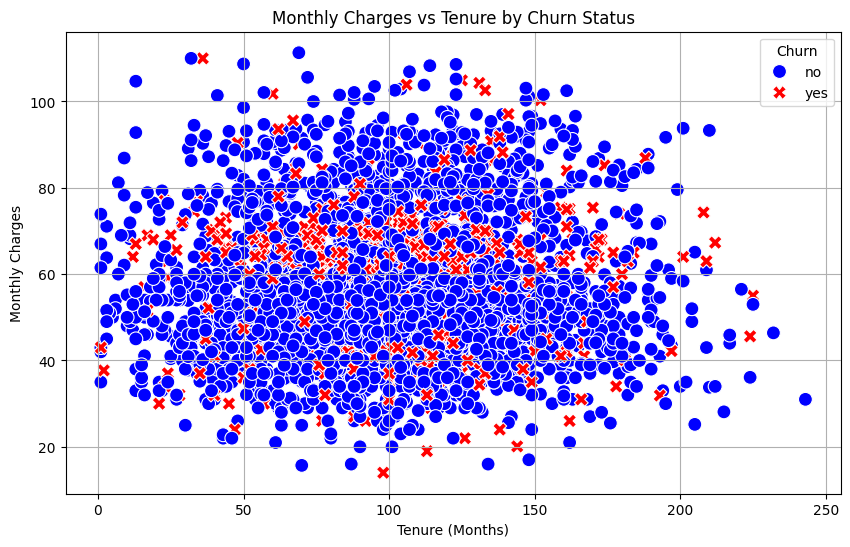

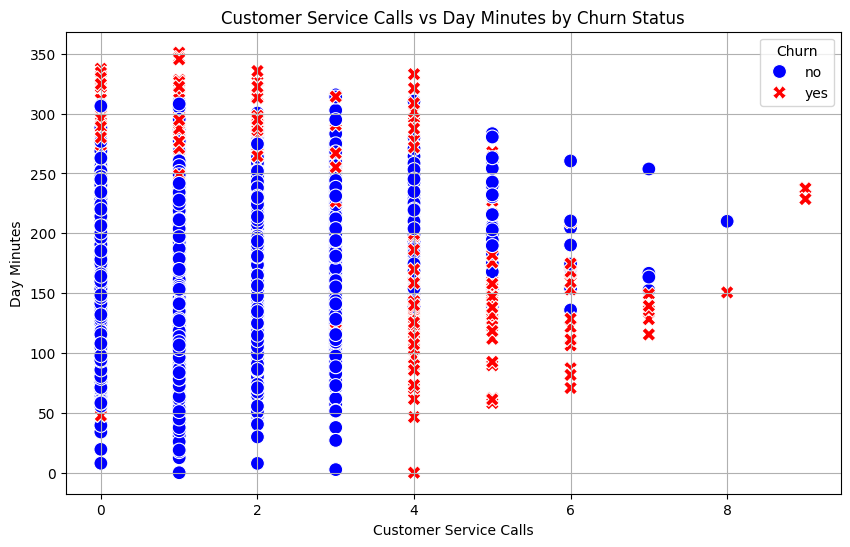

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('telecom_churn.csv')

# Print column names to check for 'total_charges'
print("Column names before cleaning:")
print(df.columns)

# Clean the column names by stripping whitespace
df.columns = df.columns.str.strip()

# Print column names again to verify
print("Column names after cleaning:")
print(df.columns)

# Convert 'Churn' to binary and then categorical
df['Churn'] = df['Churn'].apply(lambda x: 'yes' if x == 1 else 'no')

# Frequency bar chart for total number of churned vs. not churned customers
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', palette={"no": "blue", "yes": "red"})
plt.title('Total Count of Churned vs Not Churned Customers')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Scatter plot for 'tenure' vs 'monthly_charges'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AccountWeeks', y='MonthlyCharge', hue='Churn', style='Churn',
                markers={"yes": "X", "no": "o"}, palette={'yes': 'red', 'no': 'blue'}, s=100)
plt.title('Monthly Charges vs Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.show()

# Scatter plot for 'CustServCalls' vs 'DayMins'
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='CustServCalls',
    y='DayMins',
    hue='Churn',
    style='Churn',
    markers={'yes': 'X', 'no': 'o'},  # Unique markers for Churn status
    palette={'yes': 'red', 'no': 'blue'},  # Colors for Churn status
    s=100  # Marker size
)
plt.title('Customer Service Calls vs Day Minutes by Churn Status')
plt.xlabel('Customer Service Calls')
plt.ylabel('Day Minutes')
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()

Columns in the DataFrame:
Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')


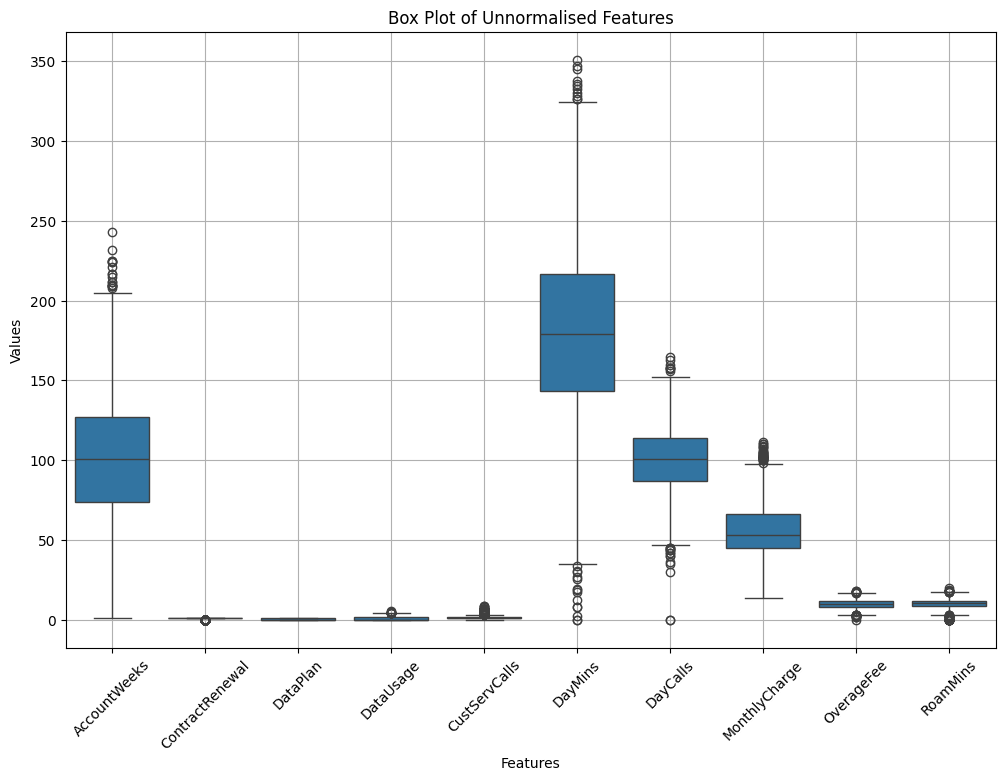

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('telecom_churn.csv')

# Print the columns to find the correct numerical features
print("Columns in the DataFrame:")
print(df.columns)

# Select the numeric features to plot (unnormalised)
# Update this list based on the actual numerical columns in your dataset
numerical_features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']  # Ensure correct spelling and capitalization

# Melt the DataFrame to long format for boxplot
df_melted = df[numerical_features].melt(var_name='Feature', value_name='Value')

# Create the box plot for unnormalised data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='Feature', y='Value')
plt.title('Box Plot of Unnormalised Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Normalized Features:
   AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0.676388         0.327531  1.616843   1.479982      -0.427868   
1      0.149043         0.327531  1.616843   2.265733      -0.427868   
2      0.902393         0.327531 -0.618303  -0.641546      -1.188040   
3     -0.428526        -3.052227 -0.618303  -0.641546       0.332305   
4     -0.654531        -3.052227 -0.618303  -0.641546       1.092477   

    DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  Churn  
0  1.566532  0.476572       1.990428   -0.071573 -0.084995      0  
1 -0.333688  1.124334       1.564276   -0.107066  1.240296      0  
2  1.168128  0.675883      -0.262094   -1.574109  0.703015      0  
3  2.196267 -1.466716       0.042301   -2.741435 -1.302831      0  
4 -0.240054  0.626055      -0.931763   -1.037771 -0.049177      0  


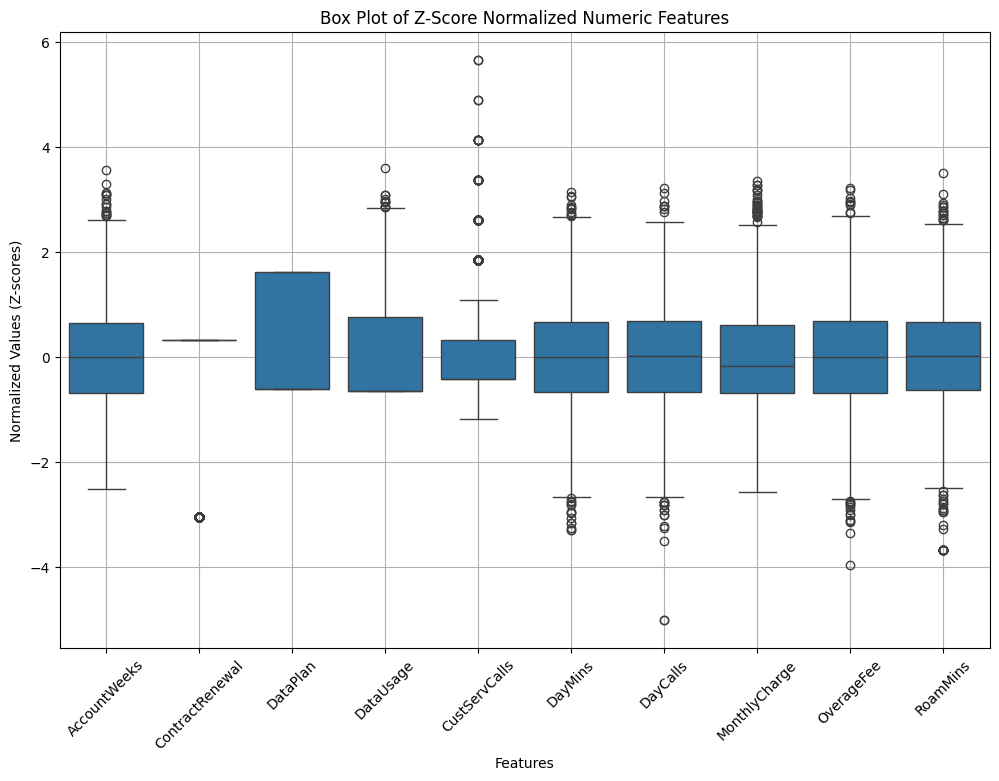

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('telecom_churn.csv')

# Select numeric features for normalization
numerical_features = df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 
                         'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 
                         'OverageFee', 'RoamMins']]
target = df['Churn']

# Apply Z-score normalization to numeric features
means = numerical_features.mean()
stds = numerical_features.std()
numerical_normalized = (numerical_features - means) / stds

# Combine normalized features with the target column
df_normalized = pd.concat([numerical_normalized, target], axis=1)

# Save the normalized data for future use
df_normalized.to_csv('normalized_telecom_churn.csv', index=False)

# Display the first few rows of the normalized data
print("Normalized Features:")
print(df_normalized.head())

# Melt the DataFrame for boxplot visualization of the numeric columns
numeric_cols_normalized = numerical_normalized.melt(var_name='Feature', value_name='Value')

# Create the box plot for the normalized numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_cols_normalized, x='Feature', y='Value')
plt.title('Box Plot of Z-Score Normalized Numeric Features')
plt.xticks(rotation=45)
plt.ylabel('Normalized Values (Z-scores)')
plt.xlabel('Features')
plt.grid(True)
plt.show()

Test Set Class Distribution:
 Churn
0    570
1     97
Name: count, dtype: int64
Balanced Test Set Class Distribution:
 Churn
1    97
0    97
Name: count, dtype: int64
Actual vs Predicted Probabilities:
      Actual  Predicted Probability
2258       1               0.936625
2936       1               0.395530
1935       1               0.742002
2595       1               0.605607
2673       1               0.765284
Accuracy: 0.79


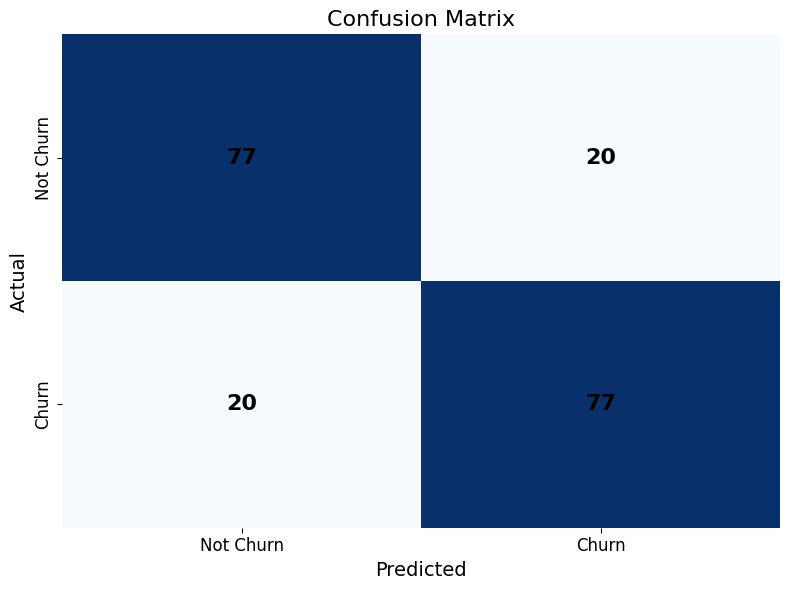

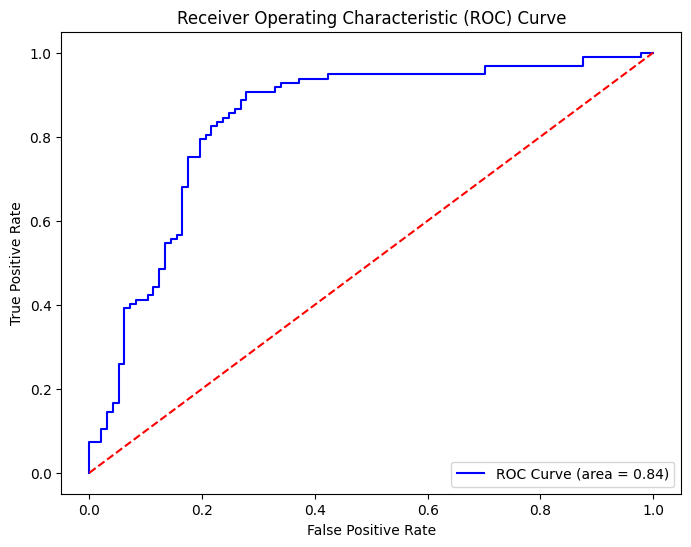

In [53]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('normalized_telecom_churn.csv')

# Specify the target variable
target_column_name = 'Churn'  # Replace with your actual target column name

# Split the data into features (X) and target variable (y)
X = df.drop(columns=[target_column_name])
y = df[target_column_name]

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Print class distribution in the test set
print("Test Set Class Distribution:\n", pd.Series(y_test).value_counts())

# Resample the test set to have an equal number of churn and non-churn cases
min_class_count = min(y_test.value_counts())  # Get the smaller class count from the test set
y_test_balanced = pd.concat([
    y_test[y_test == 1].sample(min_class_count, random_state=10),
    y_test[y_test == 0].sample(min_class_count, random_state=10)
])
X_test_balanced = X_test.loc[y_test_balanced.index]

# Print the balanced test set distribution
print("Balanced Test Set Class Distribution:\n", pd.Series(y_test_balanced).value_counts())

# Apply SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increased iterations for convergence

# Fit the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on the balanced test set
log_reg_probs = log_reg.predict_proba(X_test_balanced)[:, 1]  # Probabilities for the positive class

# Create a DataFrame for actual and predicted probabilities
results = pd.DataFrame({'Actual': y_test_balanced, 'Predicted Probability': log_reg_probs})

# Display the first few rows
print("Actual vs Predicted Probabilities:")
print(results.head())

# Adjust threshold for predicting "Churn"
new_threshold = 0.5
log_reg_preds = (log_reg_probs >= new_threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_balanced, log_reg_preds)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_balanced, log_reg_preds)

# Improved visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'],
            annot_kws={"size": 16, "weight": "bold", "color": "black"})  # Larger, bold annotations
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_balanced, log_reg_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Test Set Class Distribution:
 Churn
0    570
1     97
Name: count, dtype: int64
Balanced Test Set Class Distribution:
 Churn
1    97
0    97
Name: count, dtype: int64


c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5484 - loss: 0.7826 - val_accuracy: 0.4748 - val_loss: 0.6948 - learning_rate: 6.0000e-04
Epoch 2/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6424 - loss: 0.6769 - val_accuracy: 0.4408 - val_loss: 0.7368 - learning_rate: 6.0000e-04
Epoch 3/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6796 - loss: 0.6248 - val_accuracy: 0.5088 - val_loss: 0.7401 - learning_rate: 6.0000e-04
Epoch 4/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7166 - loss: 0.5870 - val_accuracy: 0.5888 - val_loss: 0.7144 - learning_rate: 6.0000e-04
Epoch 5/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7501 - loss: 0.5369 - val_accuracy: 0.6338 - val_loss: 0.6895 - learning_rate: 6.0000e-04
Epoch 6/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7583 - loss: 0.5221 - val_accuracy: 0.6765 - val_loss: 0.6643 - learning_rate: 6.0000e-04
Epoch 7/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7594 

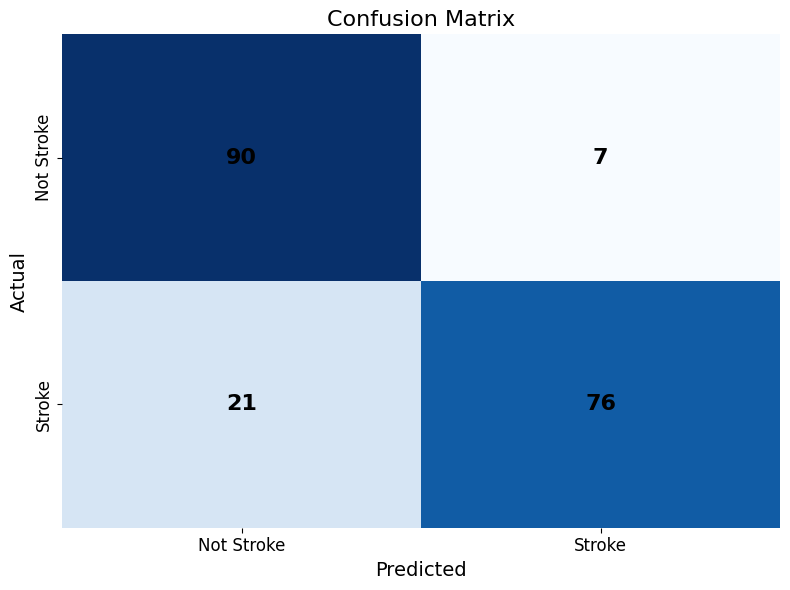

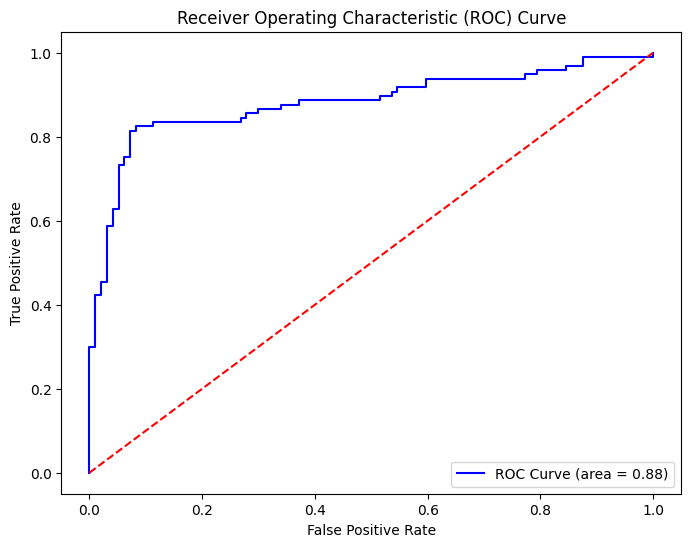

In [ ]:
# Logistic Regression Model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import StandardScaler

# Load the normalised dataset
df = pd.read_csv('normalized_telecom_churn.csv')  # Adjusted file name

# Specify the target variable
target_column_name = 'Churn'

# Split the data into features (X) and target variable (y)
X = df.drop(columns=[target_column_name]) 
y = df[target_column_name]

# Adjust the hyperparameters
epochs = 150
batch_size = 64
learning_rate = 0.0006

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

# Print class distribution in the test set
print("Test Set Class Distribution:\n", pd.Series(y_test).value_counts())

# Resample the test set to have an equal number of stroke and non-stroke cases
min_class_count = min(y_test.value_counts())  # Get the smaller class count from the test set
y_test_balanced = pd.concat([
    y_test[y_test == 1].sample(min_class_count, random_state=10) if (y_test[y_test == 1].size > 0) else pd.Series(dtype=int),
    y_test[y_test == 0].sample(min_class_count, random_state=10) if (y_test[y_test == 0].size > 0) else pd.Series(dtype=int)
])

X_test_balanced = X_test.loc[y_test_balanced.index]

# Print the balanced test set distribution
print("Balanced Test Set Class Distribution:\n", pd.Series(y_test_balanced).value_counts())

# Apply SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_balanced = scaler.transform(X_test_balanced)

# Build the Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)))  # Input layer
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(BatchNormalization())  # Batch normalization for stability
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(BatchNormalization())  # Batch normalization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model with the specified learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate reduction and early stopping
lr_reduction = ReduceLROnPlateau(monitor='loss', patience=5, factor=0.5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model (removed class_weight parameter)
model.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=batch_size, 
          verbose=1, 
          validation_split=0.2,  # Add validation split for early stopping
          callbacks=[lr_reduction, early_stopping])

# Predict probabilities on the balanced test set
log_reg_probs = model.predict(X_test_balanced).flatten()  # Probabilities for the positive class

# Create a DataFrame for actual and predicted probabilities
results = pd.DataFrame({'Actual': y_test_balanced, 'Predicted Probability': log_reg_probs})

# Display the first few rows
print("Actual vs Predicted Probabilities:")
print(results.head())

# Adjust threshold for predicting "Stroke"
new_threshold = 0.5
log_reg_preds = (log_reg_probs >= new_threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_balanced, log_reg_preds)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_balanced, log_reg_preds)

# Improved visualisation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Stroke', 'Stroke'],
            yticklabels=['Not Stroke', 'Stroke'],
            annot_kws={"size": 16, "weight": "bold", "color": "black"})  # Larger, bold annotations
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_balanced, log_reg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Test Set Class Distribution:
 Churn
0    570
1     97
Name: count, dtype: int64
Balanced Test Set Class Distribution:
 Churn
1    97
0    97
Name: count, dtype: int64
Resampled Training Set Shape:
 (4560, 10) (4560,)
Gradient Boosting Accuracy: 0.88


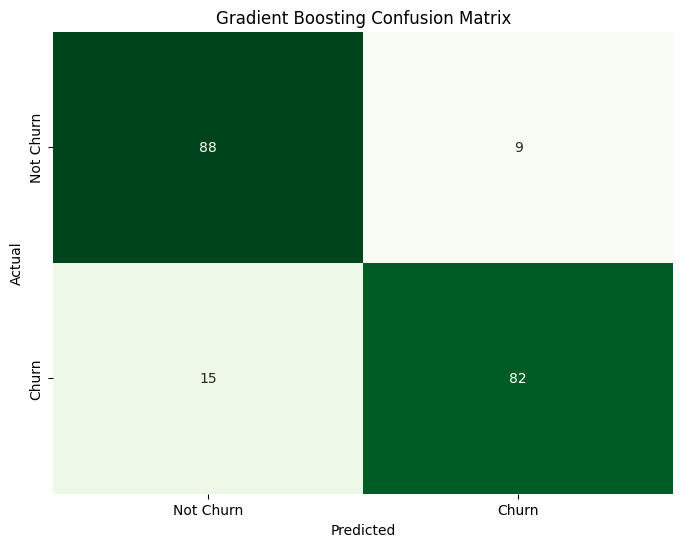

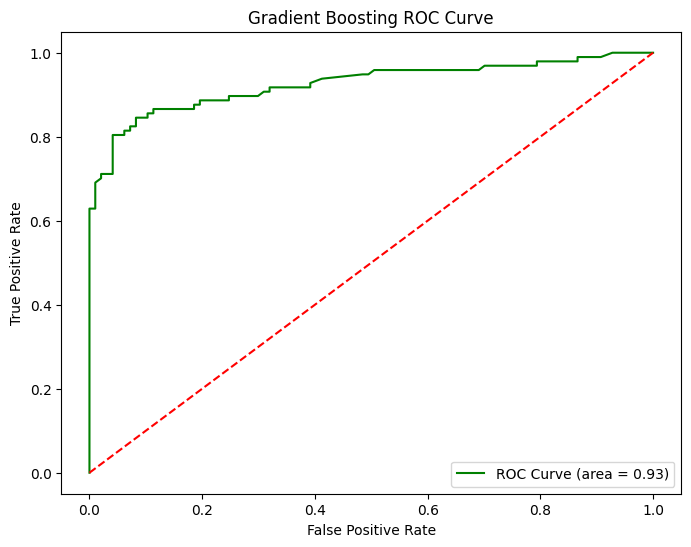

In [ ]:
# Gradient Boosting Model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load the telecom churn dataset
df = pd.read_csv('normalized_telecom_churn.csv')  # Adjusted file name

# Specify the target variable
target_column_name = 'Churn'  # Ensure this matches the column name in your dataset

# Split the data into features (X) and target variable (y)
X = df.drop(columns=[target_column_name])
y = df[target_column_name]

# Adjust the hyperparameters
gb_n_estimators = 100
gb_learning_rate = 0.03
gb_max_depth = 3

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Check the class distribution in the test set
print("Test Set Class Distribution:\n", pd.Series(y_test).value_counts())

# Resample the test set to have an equal number of churned and non-churned customers
min_class_count = min(y_test.value_counts())  # Get the smaller class count from the test set
y_test_balanced = pd.concat([ 
    y_test[y_test == 1].sample(min_class_count, random_state=10) if (y_test[y_test == 1].size > 0) else pd.Series(dtype=int),
    y_test[y_test == 0].sample(min_class_count, random_state=10) if (y_test[y_test == 0].size > 0) else pd.Series(dtype=int)
])
X_test_balanced = X_test.loc[y_test_balanced.index]

# Print the balanced test set distribution
print("Balanced Test Set Class Distribution:\n", pd.Series(y_test_balanced).value_counts())

# Apply SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled training data
print("Resampled Training Set Shape:\n", X_train_resampled.shape, y_train_resampled.shape)

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=gb_n_estimators,
    learning_rate=gb_learning_rate,
    max_depth=gb_max_depth,
    random_state=5
)

# Fit the model on the resampled training data
gb_model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on the test set
y_probs_gb = gb_model.predict_proba(X_test_balanced)[:, 1]  # Probabilities for the positive class

# Calculate predicted classes based on a threshold of 0.5
y_preds_gb = (y_probs_gb >= 0.5).astype(int)

# Calculate and print accuracy for Gradient Boosting
accuracy_gb = accuracy_score(y_test_balanced, y_preds_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb:.2f}')

# Confusion Matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test_balanced, y_preds_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test_balanced, y_probs_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='green', label=f'ROC Curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.show()